# Face recognition and Face detection using the OpenCV

The face recognition is a technique to identify or verify the face from the digital images or video frame. A human can quickly identify the faces without much effort. It is an effortless task for us, but it is a difficult task for a computer. There are various complexities, such as low resolution, occlusion, illumination variations, etc. These factors highly affect the accuracy of the computer to recognize the face more effectively. First, it is necessary to understand the difference between face detection and face recognition.

### Face Detection: The face detection is generally considered as finding the faces (location and size) in an image and probably extract them to be used by the face detection algorithm.

### Face Recognition: The face recognition algorithm is used in finding features that are uniquely described in the image. The facial image is already extracted, cropped, resized, and usually converted in the grayscale.

There are various algorithms of face detection and face recognition. Here we will learn about face detection using the HAAR cascade algorithm.

### The 3 Phases

To create a complete project on Face Recognition, we must work on 3 very distinct phases:

    .Face Detection and Data Gathering
    .Train the Recognizer
    .Face Recognition
    
The below block diagram resumes those phases:
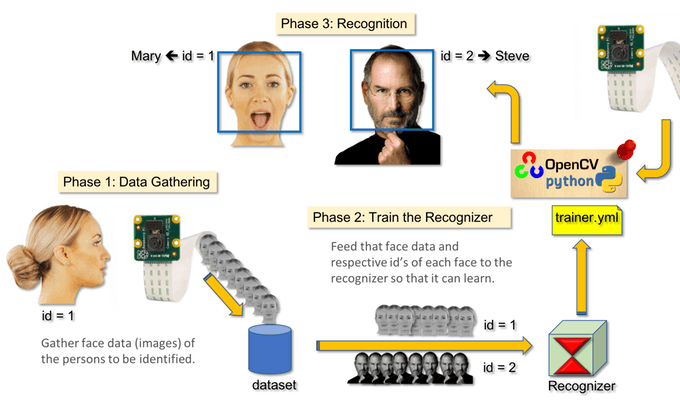
    

## Face Detection

The most basic task on Face Recognition is of course, “Face Detecting”. Before anything, you must “capture” a face in order to recognize it, when compared with a new face captured on future.

The most common way to detect a face (or any objects), is using the “Haar Cascade classifier”

Object Detection using Haar feature-based cascade classifiers is an effective object detection method.It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Here we will work with face detection. Initially, the algorithm needs a lot of positive images (images of faces) and negative images (images without faces) to train the classifier. Then we need to extract features from it. The good news is that OpenCV comes with a trainer as well as a detector. If you want to train your own classifier for any object like car, planes etc. you can use OpenCV to create one. 

If you do not want to create your own classifier, OpenCV already contains many pre-trained classifiers for face, eyes, smile, etc. 

In [1]:
mkdir dataset

A subdirectory or file dataset already exists.


In [2]:
heading=['ID','NAME']
with open('Person_Detailss.csv', 'a+') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(heading)
            csvFile.close()

NameError: name 'csv' is not defined

In [5]:
import cv2
import os
import csv
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==>  ')
face_name = input('\n enter your name end press <return> ==>  ')
print("\n [INFO] Initializing face capture. Look the camera and wait ...")

# Initialize individual sampling face count
count = 0
while(True):
    ret, img = cam.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_detector.detectMultiScale(gray,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/" + str(face_name) + '.' +str(face_id) + '.' +  
                    str(count) + ".jpg", gray[y:y+h,x:x+w])
        cv2.imshow('image', img)
    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 30: # Take 30 face sample and stop video
         break
                  
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


row = [face_id, face_name]            
with open('Person_Detailss.csv', 'a+') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(row)
            csvFile.close()


 enter user id end press <return> ==>  125

 enter your name end press <return> ==>  ram

 [INFO] Initializing face capture. Look the camera and wait ...

 [INFO] Exiting Program and cleanup stuff


Now we must call our classifier function, passing it some very important parameters, as scale factor, number of neighbors and minimum size of the detected face.

faces = faceCascade.detectMultiScale(

        gray,     
        scaleFactor=1.2,
        minNeighbors=5,     
        minSize=(20, 20)
        )
Where,

gray is the input grayscale image.

scaleFactor is the parameter specifying how much the image size is reduced at each image scale. It is used to create the scale pyramid.

minNeighbors is a parameter specifying how many neighbors each candidate rectangle should have, to retain it. A higher number gives lower false positives.

minSize is the minimum rectangle size to be considered a face.

The function will detect faces on the image. Next, we must “mark” the faces in the image, using, for example, a blue rectangle. This is done with this portion of the code:


for (x,y,w,h) in faces:

    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    
If faces are found, it returns the positions of detected faces as a rectangle with the left up corner (x,y) and having “w” as its Width and “h” as its Height ==> (x,y,w,h). 

## Trainer

On this second phase, we must take all user data from our dataset and “trainer” the OpenCV Recognizer. This is done directly by a specific OpenCV function. The result will be a .yml file that will be saved on a “trainer/” directory.

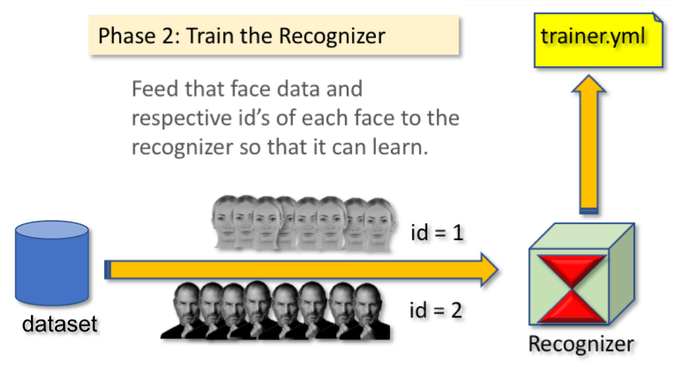
So, let’s start creating a subdirectory where we will store the trained data:

In [6]:
mkdir trainer

In [7]:
import cv2
import numpy as np
from PIL import Image
import os
# Path for face image database
path = 'dataset'
recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []
    for imagePath in imagePaths:
        PIL_img = Image.open(imagePath).convert('L') # grayscale
        img_numpy = np.array(PIL_img,'uint8')
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        
        faces = detector.detectMultiScale(img_numpy)
        
        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)
    return faceSamples,ids

print ("\n [INFO] Training faces. It will take a few seconds. Wait ...")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))
# Save the model into trainer/trainer.yml
recognizer.write('trainer/trainer.yml') 
# Print the numer of faces trained and end program
print("\n [INFO] {0} faces trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] Training faces. It will take a few seconds. Wait ...

 [INFO] 1 faces trained. Exiting Program


We will use as a recognizer, the LBPH (LOCAL BINARY PATTERNS HISTOGRAMS) Face Recognizer, included on OpenCV package to detect faces. It labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number.


The model built is trained with the faces with tag given to them, and later on, the machine is given a test data and machine decides the correct label for it.


The function “getImagesAndLabels (path)”, will take all photos on directory: “dataset/”, returning 2 arrays: “Ids” and “faces”. With those arrays as input, we will “train our recognizer”:

    .recognizer.train(faces, ids)

As a result, a file named “trainer.yml” will be saved in the trainer directory that was previously created by us.

## Recognizer

Now, we reached the final phase of our project. Here, we will capture a fresh face on our camera and if this person had his face captured and trained before, our recognizer will make a “prediction” returning its id and an index, shown how confident the recognizer is with this match.

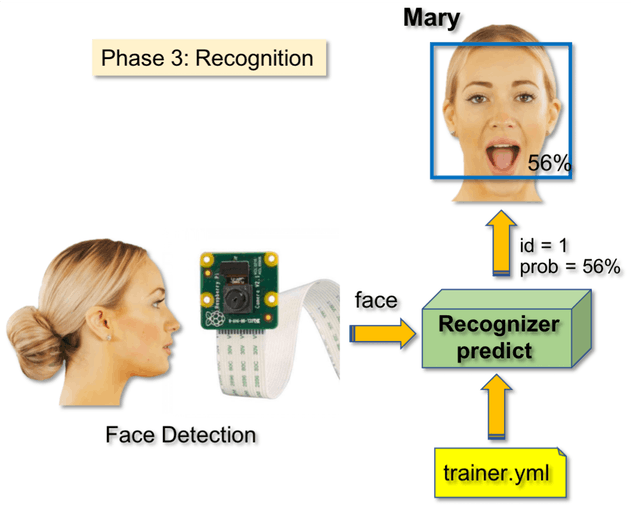

In [1]:
import cv2
import numpy as np
import pandas as pd
import os 
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')

cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0
# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height
# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)
df = pd.read_csv("Person_Detailss.csv")
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (int(minW), int(minH))
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        id, confidence = recognizer.predict(gray[y:y+h,x:x+w])
        text = df.loc[df['ID'] == id]['NAME'].values 
         # If confidence is less them 100 ==> "0" : perfect match 
        if (confidence < 100):
            id = text[0]
            confidence = "  {0}%".format(round(100 - confidence))
        else:
            id = "unknown"
            confidence = "  {0}%".format(round(100 - confidence))
        
        cv2.putText(
                    img, 
                    str(id), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )  
    
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 [INFO] Exiting Program and cleanup stuff


You can also include classifiers for “eyes detection” or even “smile detection”. On those cases, you will include the classifier function and rectangle draw inside the face loop, because would be no sense to detect an eye or a smile outside of a face.

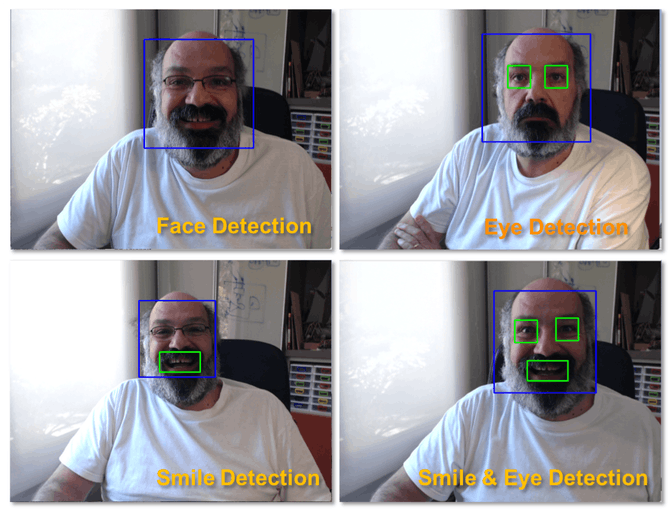